In [43]:
#!/usr/bin/env python
import numpy as np
#import matplotlib.pyplot as plt
import os
import sys
import glob
from sys import getsizeof
import uproot

In [54]:
#A file needs prediction/reconstruction
f = uproot.open('/Volumes/Others/backup/Reduced_data/L2ReducedFL_8-120-TM3-Fe-SCD0.root')

X = f['L2']['fCal/DetBranch/fX'].array()
Y = f['L2']['fCal/DetBranch/fY'].array()
Z = f['L2']['fCal/DetBranch/fZ'].array()
Adc = f['L2']['fCal/DetBranch/fAdc'].array()
#True_Energy = f['L2']['fTrue/fEnergy'].array() #Only for MC

Tracking_angle_dummy = f['L2']['fEvent/fEvent.PDIRCOS[3]'].array()
Tracking_angle = []
for i in range(len(Tracking_angle_dummy)):
    Tracking_angle.append(Tracking_angle_dummy[i][3][2])
Angle = np.array(Tracking_angle)

#prepare for imgs
x_all, y_all, xz_all, yz_all = [], [], [], []
ADC_xz_all, ADC_yz_all = [],[]
evtnum = len(Adc)
for i in range(evtnum):
    x_idx = np.where(abs(X[i])>0.001)[0]
    y_idx = np.where(abs(Y[i])>0.001)[0]
    x_pos = X[i][x_idx]
    y_pos = Y[i][y_idx]
    xz_pos = Z[i][x_idx]
    yz_pos = Z[i][y_idx]
    
    ADC_xz = Adc[i][x_idx]
    ADC_xz = np.array(ADC_xz)
    invalid_x_idx = np.where(ADC_xz<0)[0] #set -9999 Adc to 0
    if len(invalid_x_idx) > 0:
        ADC_xz[invalid_x_idx] = 0
    
    ADC_yz = Adc[i][y_idx]
    ADC_yz = np.array(ADC_yz)
    invalid_y_idx = np.where(ADC_yz<0)[0] #set -9999 Adc to 0
    if len(invalid_y_idx) > 0:
        ADC_yz[invalid_y_idx] = 0
        
    x_all.append(x_pos)
    y_all.append(y_pos)
    xz_all.append(xz_pos)
    ADC_xz_all.append(ADC_xz)
    yz_all.append(yz_pos)
    ADC_yz_all.append(ADC_yz)

x_all = np.array(x_all)
y_all = np.array(y_all)
xz_all = np.array(xz_all)
yz_all = np.array(yz_all)
ADC_xz_all = np.array(ADC_xz_all)
ADC_yz_all = np.array(ADC_yz_all)

profile = []
profile.append(x_all)
profile.append(y_all)
profile.append(xz_all)
profile.append(yz_all)
profile.append(ADC_xz_all)
profile.append(ADC_yz_all) 
profile = np.array(profile)  

#save images
xz_imgs, yz_imgs = [],[]
for i in range(len(xz_all)):
    x_pix, y_pix = np.round(profile[0][i]/10-0.5)+25.5, np.round(profile[1][i]/10-0.5)+25.5
    xz_pix = np.round(profile[2][i]/4.55)-0.5
    yz_pix = np.round(profile[3][i]/4.55)-0.5

    xz_img, buf, buf = np.histogram2d(x_pix, xz_pix, weights=profile[4][i], bins=(range(51), range(21)) )   
    yz_img, buf, buf = np.histogram2d(y_pix, yz_pix, weights=profile[5][i], bins=(range(51), range(21)) ) 

    xz_imgs.append(xz_img)
    yz_imgs.append(yz_img)
xz_imgs = np.array(xz_imgs)
yz_imgs = np.array(yz_imgs)

#merge xz and yz imgs
xzyz_imgs_vertical_dummy = []
xzyz_imgs_vertical = []
TotalEdep = []

for i in range(len(xz_imgs)):
    xzyz_imgs_vertical_dummy.append(np.rot90(np.append(yz_imgs[i], xz_imgs[i], axis=1),1))
       
xzyz_imgs_vertical_dummy = np.array(xzyz_imgs_vertical_dummy)

for i in range(len(xzyz_imgs_vertical_dummy)):
    if xzyz_imgs_vertical_dummy[i].sum() > 0:
        xzyz_imgs_vertical.append(xzyz_imgs_vertical_dummy[i]/xzyz_imgs_vertical_dummy[i].sum()) #sum norm
xzyz_imgs_vertical = np.array(xzyz_imgs_vertical)
 
#Save to numpy file
#np.save('./V14_FL_vertical_imgs.npy', xzyz_imgs_vertical)
#np.save('./V14_FL_angle.npy', Angle)
np.save('./Fe_Flux/FeFL_8-120-SCD0_imgs.npy', xzyz_imgs_vertical)
np.save('./Fe_Flux/FeFL_8-120-SCD0_angles.npy', Angle)
#np.save('./Fe_Flux/FeMC_8-120-SCD0_trueE.npy', True_Energy)



<ipython-input-54-11d7bbb63c09>:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_all = np.array(x_all)
<ipython-input-54-11d7bbb63c09>:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_all = np.array(y_all)
<ipython-input-54-11d7bbb63c09>:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xz_all = np.array(xz_all)
<ipython-input

In [4]:
#read MC and save (FL in the next block)
#files = sorted(glob.glob('/Volumes/mac_linux/L2V14/Reduced/L2ReducedMC_8-120-TM3-fiducial-chisq-Fe.root'))

for file in range(len(files)):
    #f = uproot.open(files[file])
    fX = f['L2']['fCal/DetBranch/fX'].array()
    fY = f['L2']['fCal/DetBranch/fY'].array()
    fZ = f['L2']['fCal/DetBranch/fZ'].array()
    fAdc = f['L2']['fCal/DetBranch/fAdc'].array()

    fTrueE = f['L2']['fTrue/fEnergy'].array()
    fCharge = f['L2']['fTrue/fCharge'].array()

    Tracking_angle_dummy = f['L2']['fEvent/fEvent.PDIRCOS[3]'].array()
    Tracking_angle = []
    for i in range(len(Tracking_angle_dummy)):
        Tracking_angle.append(Tracking_angle_dummy[i][3][2])
    Tracking_angle = np.array(Tracking_angle)
    
    if file == 0:
        X = fX
        Y = fY
        Z = fZ
        Adc = fAdc
        True_Energy = fTrueE
        Angle = Tracking_angle
        Charge = fCharge
    
    if file > 0:
        X = np.append(fX, X)
        Y = np.append(fY, Y)
        Z = np.append(fZ, Z)
        Adc = np.append(fAdc, Adc)
        True_Energy = np.append(fTrueE, True_Energy)
        Angle = np.append(Tracking_angle, Angle)
        Charge = np.append(fCharge, Charge)
    

    
#prepare for imgs
x_all, y_all, xz_all, yz_all = [], [], [], []
MeV_xz_all, MeV_yz_all = [],[]
evtnum = len(Adc)
for i in range(evtnum):
    x_idx = np.where(abs(X[i])>0.001)[0]
    y_idx = np.where(abs(Y[i])>0.001)[0]
    x_pos = X[i][x_idx]
    y_pos = Y[i][y_idx]
    xz_pos = Z[i][x_idx]
    yz_pos = Z[i][y_idx]
    
    MeV_xz = Adc[i][x_idx]
    #invalid_x_idx = np.where(MeV_xz<0)[0] #set -9999 Adc to 0
    #MeV_xz[invalid_x_idx] = 0
    
    MeV_yz = Adc[i][y_idx]
    #invalid_y_idx = np.where(MeV_yz<0)[0] #set -9999 Adc to 0
    #MeV_yz[invalid_y_idx] = 0
        
    x_all.append(x_pos)
    y_all.append(y_pos)
    xz_all.append(xz_pos)
    MeV_xz_all.append(MeV_xz)
    yz_all.append(yz_pos)
    MeV_yz_all.append(MeV_yz)

x_all = np.array(x_all)
y_all = np.array(y_all)
xz_all = np.array(xz_all)
yz_all = np.array(yz_all)
MeV_xz_all = np.array(MeV_xz_all)
MeV_yz_all = np.array(MeV_yz_all)

profile = []
profile.append(x_all)
profile.append(y_all)
profile.append(xz_all)
profile.append(yz_all)
profile.append(MeV_xz_all)
profile.append(MeV_yz_all) 
profile = np.array(profile)  

#save images
xz_imgs, yz_imgs = [],[]
for i in range(len(xz_all)):
    x_pix, y_pix = np.round(profile[0][i]/10-0.5)+25.5, np.round(profile[1][i]/10-0.5)+25.5
    xz_pix = np.round(profile[2][i]/4.55)-0.5
    yz_pix = np.round(profile[3][i]/4.55)-0.5

    xz_img, buf, buf = np.histogram2d(x_pix, xz_pix, weights=profile[4][i], bins=(range(51), range(21)) )   
    yz_img, buf, buf = np.histogram2d(y_pix, yz_pix, weights=profile[5][i], bins=(range(51), range(21)) ) 

    xz_imgs.append(xz_img)
    yz_imgs.append(yz_img)
xz_imgs = np.array(xz_imgs)
yz_imgs = np.array(yz_imgs)

#merge xz and yz imgs
xzyz_imgs_vertical_dummy, xzyz_imgs_para_dummy = [], []
xzyz_imgs_vertical, xzyz_imgs_para = [], []
TotalEdep = []

for i in range(len(xz_imgs)):
    xzyz_imgs_vertical_dummy.append(np.rot90(np.append(yz_imgs[i], xz_imgs[i], axis=1),1))
       
xzyz_imgs_vertical_dummy = np.array(xzyz_imgs_vertical_dummy)

for i in range(len(xzyz_imgs_vertical_dummy)):
    if xzyz_imgs_vertical_dummy[i].sum() > 800: #Change cuts here 400*factor
        xzyz_imgs_vertical.append(xzyz_imgs_vertical_dummy[i]/xzyz_imgs_vertical_dummy[i].sum()) #sum norm

xzyz_imgs_vertical = np.array(xzyz_imgs_vertical)
 
#Save to numpy file
#np.save('./V14_MC_vertical_imgs.npy', xzyz_imgs_vertical)
#np.save('./V14_MC_true_energy.npy', True_Energy)
#np.save('./V14_MC_angle.npy', Angle)
#np.save('./V14_MC_charge.npy', Charge)




192


<ipython-input-4-861e8b966f0e>:66: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_all = np.array(x_all)
<ipython-input-4-861e8b966f0e>:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_all = np.array(y_all)
<ipython-input-4-861e8b966f0e>:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xz_all = np.array(xz_all)
<ipython-input-4-

<ipython-input-5-83f7b88500ed>:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("rainbow"))
  cmap.set_under(color='white')


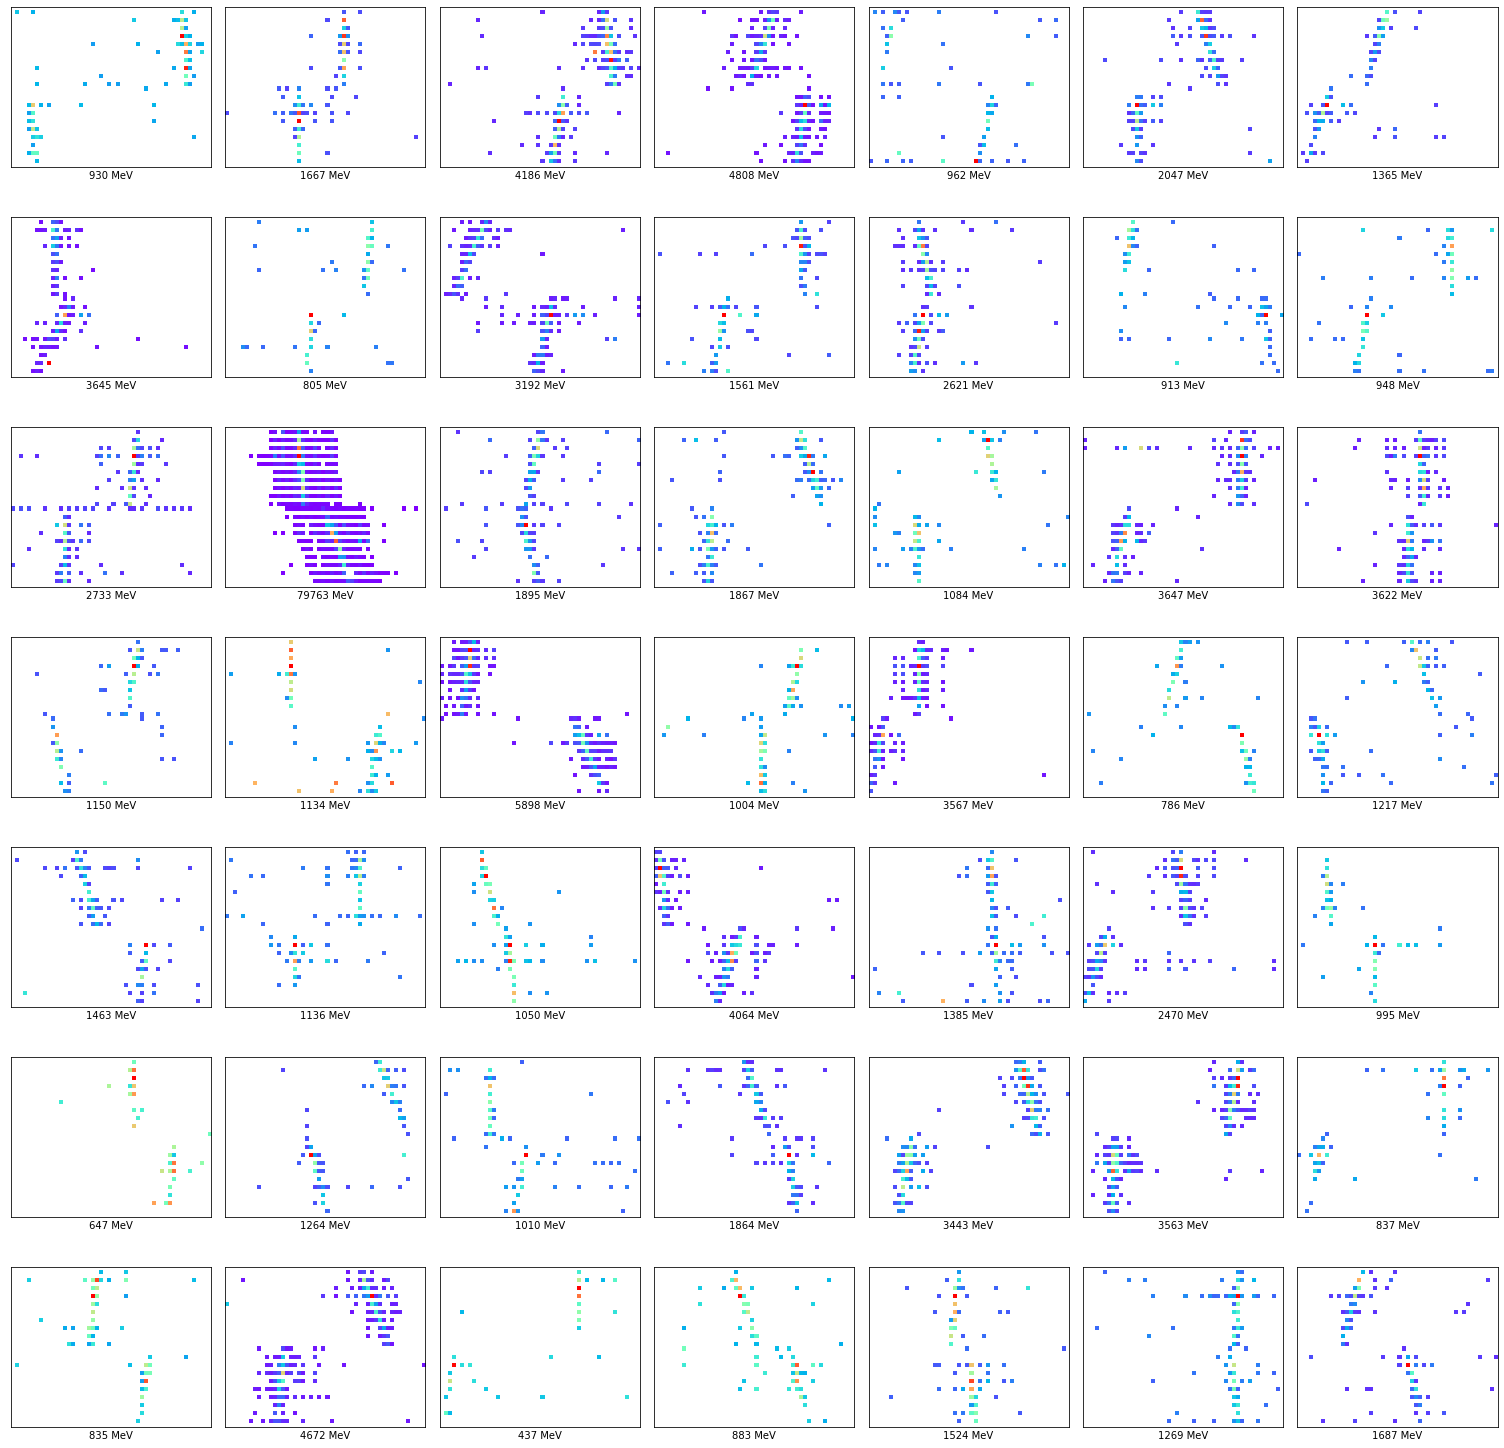

In [5]:
import matplotlib.pyplot as plt

def plot_image(true_energy, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    cmap=plt.cm.rainbow
    cmap.set_under(color='white') 
    plt.imshow(img, cmap=cmap, vmin=1e-7)
    
    plt.xlabel("%d MeV" %(true_energy))

num_rows = 7
num_cols = 7
num_images = num_rows*num_cols
plt.figure(figsize=(3*num_cols, 3*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(xzyz_imgs_vertical_dummy[i].sum()*0.45, xzyz_imgs_vertical[i])
    
    plt.subplots_adjust(wspace = 0.5 )
plt.tight_layout()
plt.show()